**"A Study in order to Forecast the future trends for Precipitation to measure Rainfall, Snow and Heat patterns in NEWS Regions of U.S.A." : A Time Series Approach**

In [1]:
# importing and installing the necessary libraries

import csv
import pandas as pd
import numpy as np
import json

from matplotlib.pylab import rcParams #for parsing the date for time series
from datetime import datetime
rcParams["figure.figsize"] = 10,10

from statsmodels.tsa.stattools import adfuller #for ADF Statistics
import statsmodels.api as sm
import math

import matplotlib.mlab as mlab # libraries for ARIMA Model
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

import geopandas
import sys 

import matplotlib as mpl
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from shapely.geometry import Point, Polygon, LineString

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

#!pip install descartes
from descartes.patch import PolygonPatch


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

                                               EAST U.S.A (VIRGINIA)

**1. Data Preparation**

In [2]:
#reading the csv_file of virginia - East U.S.A

filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/east.csv"
vir = pd.read_csv(filename,header = None)
vir.fillna(0, inplace=True)
vir.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,Date,DISPUTANTA,EMPORIA 1 WNW,FREDERICKSBURG SEWAGE,HOPEWELL,NORFOLK INTL AP,NORFOLK S,N,PAINTER 2W,STONY CREEK 2 N,SUFFOLK LAKE KILBY,WAKEFIELD 1NW,WAKEFIELD MUNI AP,WALKERTON 2 NW,WALLACETON LK DRUMMOND,WALLOPS IS NASA TEST FACILITY,WARSAW 2 NW,W PT 2 NW,WILLIAMSBURG 2 N,ALBERTA 5N,AMELIA COURTHOUSE 1,ASHLAND,BUCKINGHAM,FT PICKETT,CHASE CITY,CLARKSVILLE,CORBIN,CROZIER,FARMVILLE 2 N,JOHN H KERR DAM,KEYSVILLE 2 S,LOUISA,PALMYRA 3S,PETERSBURG,RICHMOND INTL AP,WINTERPOCK,ALTAVISTA,APPOMATTOX,BEDFORD,BROOKNEAL,CHARLOTTESVILLE 2W,CHARLOTTESVILLE-ALBEMARLE AP,CHATHAM,CONCORD 4 SSW,DANVILLE 2 SE,DANVILLE RGNL AP,FREE UNION,BIG IS,HUDDLESTON 4 SW,LYNCHBURG INTL AP,MARTINSVILLE FLTR PLT,MEADOWS OF DAN 5 SW,MONTEBELLO FISH CULTURAL STN,PEDLAR DAM,ROCKY MT,S BOSTON,STUART,WOOLWINE 1 SE,FRONT ROYAL,PURCELLVILLE,LURAY 5 E,MANASSAS,MT WX 3,PIEDMONT RSCH STN,SOMERSET,SPERRYVILLE,WFO STERLING,VIENNA,WASHINGTON DULLES INTL AP,WASHINGTON REAGAN NATL AP,WINCHESTER,WINCHESTER 7 SE,WOODSTOCK 2 NE,BUENA VISTA,COVINGTON FLTR PLT,DALE ENTERPRISE,GATHRIGHT DAM,GLASGOW 1 SE,HOT SPRINGS,LEXINGTON,MILL GAP,MUSTOE 1 SW,NEW CASTLE,ROANOKE 8 N,ROANOKE INTL AP,STAUNTON WTP,WAYNESBORO WTP,MOUNTAIN,ABINGDON 3S,BIG STONE GAP,BLACKSBURG NWSO,BURKES GARDEN,CHRISTIANSBURG,CLINTWOOD 1W,COPPER HILL,ELK CREEK 4SSW,GALAX WTP,GRUNDY,LEBANON,NORA 4 SSE,PULASKI 2 E,RICHLANDS,SALTVILLE 1N,WISE 1SE
1,01-01-2019,0.08,0.21,0.25,0.01,0,0,0,0,0,0,0,0,0,0.12,0,0,0.01,0,0.09,0,0.01,0.2,0.12,0.13,0.1,0.25,0.2,0.2,0.05,0.14,0,0.06,0,0,0.16,0.17,0.21,0.24,0.13,0.21,0,0.22,0.26,0,0,0.22,0.15,0.11,0,0.25,0.1,0,0.14,0.12,0.17,0.16,0.02,0.02,0.55,0,0.4,0.5,0.13,0.34,0.35,0,0.63,0,0,0.44,0.36,0,0.1,0.2,0.36,0.4,0.13,0.27,0.35,0,0.11,0.06,0,0.3,0.16,0.38,0.25,0.53,0.05,0.15,0.02,0.32,0.04,0.03,0.01,0.27,0,0.24,0.02,0.03,0.3,0.33,0.09
2,02-01-2019,0,0,0,0,0.02,0.01,0,0,0.04,0.07,0.04,0.04,0,0,0.02,0,0,0.08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.29,0.02,0,0,0,0,0,0,0,0,0,0.05,0.07,0,0,0,0.06,0,0,0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.04,0,0,0,0,0.02,0,0,0,0,0,0,0,0,0.71,0,0,0,0,0.02,0
3,03-01-2019,0.29,0.25,0,0.36,0.3,0.3,0.45,0.49,0.35,0.27,0.37,0.36,0.21,0.35,0.2,0.2,0.34,0.36,0.41,0.2,0.12,0.02,0.45,0.47,0.45,0.02,0.12,0.18,0.37,0.41,0,0.06,0.09,0.16,0.24,0.35,0.26,0.25,0.4,0,0,0.52,0.25,0,0.4,0.01,0.18,0.34,0.17,0.92,0.77,0,0.13,0.38,0.48,0.63,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03,0,0,0,0.14,0.04,0,0,0.1,0.12,0.1,0,0,0,0.42,0.43,0.21,0.24,0.25,0.28,0.28,0.28,0.38,0.28,0.31,0.34,0.15,0.14,0.4,0.3,0.15
4,04-01-2019,0.03,0.05,0,0.19,0.12,0.13,0,0.03,0.34,0.26,0.16,0.16,0.12,0.05,0.08,0.05,0.08,0.08,0.04,0,0.11,0,0.06,0,0,0,0,0.02,0.01,0,0.02,0,0.15,0.1,0.04,0,0,0,0.02,0,0.21,0.05,0.02,0.65,0.29,0,0,0.11,0.19,0.05,0.06,0,0,0,0.02,0.01,0,0,0,0,0,0,0,0,0,0.04,0,0.03,0.04,0,0,0.34,0,0,0,0,0,0,0,0.28,0,0,0.25,0,0,0,0.08,0.1,0,0,0,0.05,0.08,0.04,0,0.05,0.01,0.03,0,0,0,0.24,0


In [3]:
#exporting the cleaned csv_to_excel inorder to make the deep analysis for the cleaned data

#export_excel = vir.to_excel (r'C:/Users/Deepan Ilangkamban R/Desktop/DD/export_east.xlsx', index = None, header=True)

In [4]:
#importing the updated csv in order to make the predictions and forecasting

filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/east.csv"
east = pd.read_csv(filename)
east.head(5)

,Date,DISPUTANTA,EMPORIA 1 WNW,FREDERICKSBURG SEWAGE,HOPEWELL,NORFOLK INTL AP,NORFOLK S,N,PAINTER 2W,STONY CREEK 2 N,SUFFOLK LAKE KILBY,WAKEFIELD 1NW,WAKEFIELD MUNI AP,WALKERTON 2 NW,WALLACETON LK DRUMMOND,WALLOPS IS NASA TEST FACILITY,WARSAW 2 NW,W PT 2 NW,WILLIAMSBURG 2 N,ALBERTA 5N,AMELIA COURTHOUSE 1,ASHLAND,BUCKINGHAM,FT PICKETT,CHASE CITY,CLARKSVILLE,CORBIN,CROZIER,FARMVILLE 2 N,JOHN H KERR DAM,KEYSVILLE 2 S,LOUISA,PALMYRA 3S,PETERSBURG,RICHMOND INTL AP,WINTERPOCK,ALTAVISTA,APPOMATTOX,BEDFORD,BROOKNEAL,CHARLOTTESVILLE 2W,CHARLOTTESVILLE-ALBEMARLE AP,CHATHAM,CONCORD 4 SSW,DANVILLE 2 SE,DANVILLE RGNL AP,FREE UNION,BIG IS,HUDDLESTON 4 SW,LYNCHBURG INTL AP,MARTINSVILLE FLTR PLT,MEADOWS OF DAN 5 SW,MONTEBELLO FISH CULTURAL STN,PEDLAR DAM,ROCKY MT,S BOSTON,STUART,WOOLWINE 1 SE,FRONT ROYAL,PURCELLVILLE,LURAY 5 E,MANASSAS,MT WX 3,PIEDMONT RSCH STN,SOMERSET,SPERRYVILLE,WFO STERLING,VIENNA,WASHINGTON DULLES INTL AP,WASHINGTON REAGAN NATL AP,WINCHESTER,WINCHESTER 7 SE,WOODSTOCK 2 NE,BUENA VISTA,COVINGTON FLTR PLT,DALE ENTERPRISE,GATHRIGHT DAM,GLASGOW 1 SE,HOT SPRINGS,LEXINGTON,MILL GAP,MUSTOE 1 SW,NEW CASTLE,ROANOKE 8 N,ROANOKE INTL AP,STAUNTON WTP,WAYNESBORO WTP,MOUNTAIN,ABINGDON 3S,BIG STONE GAP,BLACKSBURG NWSO,BURKES GARDEN,CHRISTIANSBURG,CLINTWOOD 1W,COPPER HILL,ELK CREEK 4SSW,GALAX WTP,GRUNDY,LEBANON,NORA 4 SSE,PULASKI 2 E,RICHLANDS,SALTVILLE 1N,WISE 1SE
0,01-01-2019,0.08,0.21,0.25,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.01,0.00,0.09,0.00,0.01,0.20,0.12,0.13,0.10,0.25,0.20,0.20,0.05,0.14,0.00,0.06,0.00,0.00,0.16,0.17,0.21,0.24,0.13,0.21,0.00,0.22,0.26,0.00,0.00,0.22,0.15,0.11,0.00,0.25,0.10,0.00,0.14,0.12,0.17,0.16,0.02,0.02,0.55,0.00,0.4,0.5,0.13,0.34,0.35,0.00,0.63,0.00,0.00,0.44,0.36,0.00,0.10,0.20,0.36,0.40,0.13,0.27,0.35,0.00,0.11,0.06,0.00,0.30,0.16,0.38,0.25,0.53,0.05,0.15,0.02,0.32,0.04,0.03,0.01,0.27,0.00,0.24,0.02,0.03,0.30,0.33,0.09
1,02-01-2019,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.04,0.07,0.04,0.04,0.00,0.00,0.02,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.07,0.00,0.00,0.00,0.06,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.00,0.00,0.00,0.00,0.02,0.00
2,03-01-2019,0.29,0.25,0.00,0.36,0.30,0.30,0.45,0.49,0.35,0.27,0.37,0.36,0.21,0.35,0.20,0.20,0.34,0.36,0.41,0.20,0.12,0.02,0.45,0.47,0.45,0.02,0.12,0.18,0.37,0.41,0.00,0.06,0.09,0.16,0.24,0.35,0.26,0.25,0.40,0.00,0.00,0.52,0.25,0.00,0.40,0.01,0.18,0.34,0.17,0.92,0.77,0.00,0.13,0.38,0.48,0.63,0.64,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.14,0.04,0.00,0.00,0.10,0.12,0.10,0.00,0.00,0.00,0.42,0.43,0.21,0.24,0.25,0.28,0.28,0.28,0.38,0.28,0.31,0.34,0.15,0.14,0.40,0.30,0.15
3,04-01-2019,0.03,0.05,0.00,0.19,0.12,0.13,0.00,0.03,0.34,0.26,0.16,0.16,0.12,0.05,0.08,0.05,0.08,0.08,0.04,0.00,0.11,0.00,0.06,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.00,0.15,0.10,0.04,0.00,0.00,0.00,0.02,0.00,0.21,0.05,0.02,0.65,0.29,0.00,0.00,0.11,0.19,0.05,0.06,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.04,0.00,0.03,0.04,0.00,0.00,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.25,0.00,0.00,0.00,0.08,0.10,0.00,0.00,0.00,0.05,0.08,0.04,0.00,0.05,0.01,0.03,0.00,0.00,0.00,0.24,0.00
4,05-01-2019,0.17,0.20,0.11,0.00,0.01,0.01,0.10,0.13,0.03,0.00,0.01,0.01,0.06,0.27,0.03,0.08,0.03,0.00,0.18,0.18,0.06,0.39,0.16,0.26,0.25,0.13,0.00,0.20,0.24,0.23,0.09,0.32,0.00,0.05,0.22,0.22,0.44,0.29,0.29,0.43,0.06,0.24,0.36,0.00,0.00,0.33,0.47,0.34,0.00,0.29,0.60,0.49,0.44,0.28,0.35,0.40,0.60,0.09,0.26,0.18,0.0,0.3,0.00,0.34,0.35,0.09,0.18,0.11,0.04,0.37,0.37,0.10,0.33,0.28,0.16,0.32,0.43,0.35,0.32,0.29,0.31,0.28,0.06,0.31,0.16,0.38,0.75,0.79,0.41,0.35,0.35,0.50,0.26,0.55,0.46,0.43,0.00,0.39,0.49,0.25,0.89,0.2

In [5]:
# importing the updated cv files to measure the stationarity

east = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/east.csv",parse_dates= True,index_col=0, dayfirst = True)
#pd.to_datetime('1/1/2019', dayfirst=True)
east.head(5)

,DISPUTANTA,EMPORIA 1 WNW,FREDERICKSBURG SEWAGE,HOPEWELL,NORFOLK INTL AP,NORFOLK S,N,PAINTER 2W,STONY CREEK 2 N,SUFFOLK LAKE KILBY,WAKEFIELD 1NW,WAKEFIELD MUNI AP,WALKERTON 2 NW,WALLACETON LK DRUMMOND,WALLOPS IS NASA TEST FACILITY,WARSAW 2 NW,W PT 2 NW,WILLIAMSBURG 2 N,ALBERTA 5N,AMELIA COURTHOUSE 1,ASHLAND,BUCKINGHAM,FT PICKETT,CHASE CITY,CLARKSVILLE,CORBIN,CROZIER,FARMVILLE 2 N,JOHN H KERR DAM,KEYSVILLE 2 S,LOUISA,PALMYRA 3S,PETERSBURG,RICHMOND INTL AP,WINTERPOCK,ALTAVISTA,APPOMATTOX,BEDFORD,BROOKNEAL,CHARLOTTESVILLE 2W,CHARLOTTESVILLE-ALBEMARLE AP,CHATHAM,CONCORD 4 SSW,DANVILLE 2 SE,DANVILLE RGNL AP,FREE UNION,BIG IS,HUDDLESTON 4 SW,LYNCHBURG INTL AP,MARTINSVILLE FLTR PLT,MEADOWS OF DAN 5 SW,MONTEBELLO FISH CULTURAL STN,PEDLAR DAM,ROCKY MT,S BOSTON,STUART,WOOLWINE 1 SE,FRONT ROYAL,PURCELLVILLE,LURAY 5 E,MANASSAS,MT WX 3,PIEDMONT RSCH STN,SOMERSET,SPERRYVILLE,WFO STERLING,VIENNA,WASHINGTON DULLES INTL AP,WASHINGTON REAGAN NATL AP,WINCHESTER,WINCHESTER 7 SE,WOODSTOCK 2 NE,BUENA VISTA,COVINGTON FLTR PLT,DALE ENTERPRISE,GATHRIGHT DAM,GLASGOW 1 SE,HOT SPRINGS,LEXINGTON,MILL GAP,MUSTOE 1 SW,NEW CASTLE,ROANOKE 8 N,ROANOKE INTL AP,STAUNTON WTP,WAYNESBORO WTP,MOUNTAIN,ABINGDON 3S,BIG STONE GAP,BLACKSBURG NWSO,BURKES GARDEN,CHRISTIANSBURG,CLINTWOOD 1W,COPPER HILL,ELK CREEK 4SSW,GALAX WTP,GRUNDY,LEBANON,NORA 4 SSE,PULASKI 2 E,RICHLANDS,SALTVILLE 1N,WISE 1SE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.08,0.21,0.25,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.01,0.00,0.09,0.00,0.01,0.20,0.12,0.13,0.10,0.25,0.20,0.20,0.05,0.14,0.00,0.06,0.00,0.00,0.16,0.17,0.21,0.24,0.13,0.21,0.00,0.22,0.26,0.00,0.00,0.22,0.15,0.11,0.00,0.25,0.10,0.00,0.14,0.12,0.17,0.16,0.02,0.02,0.55,0.00,0.4,0.5,0.13,0.34,0.35,0.00,0.63,0.00,0.00,0.44,0.36,0.00,0.10,0.20,0.36,0.40,0.13,0.27,0.35,0.00,0.11,0.06,0.00,0.30,0.16,0.38,0.25,0.53,0.05,0.15,0.02,0.32,0.04,0.03,0.01,0.27,0.00,0.24,0.02,0.03,0.30,0.33,0.09
2019-01-02,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.04,0.07,0.04,0.04,0.00,0.00,0.02,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.07,0.00,0.00,0.00,0.06,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.00,0.00,0.00,0.00,0.02,0.00
2019-01-03,0.29,0.25,0.00,0.36,0.30,0.30,0.45,0.49,0.35,0.27,0.37,0.36,0.21,0.35,0.20,0.20,0.34,0.36,0.41,0.20,0.12,0.02,0.45,0.47,0.45,0.02,0.12,0.18,0.37,0.41,0.00,0.06,0.09,0.16,0.24,0.35,0.26,0.25,0.40,0.00,0.00,0.52,0.25,0.00,0.40,0.01,0.18,0.34,0.17,0.92,0.77,0.00,0.13,0.38,0.48,0.63,0.64,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.14,0.04,0.00,0.00,0.10,0.12,0.10,0.00,0.00,0.00,0.42,0.43,0.21,0.24,0.25,0.28,0.28,0.28,0.38,0.28,0.31,0.34,0.15,0.14,0.40,0.30,0.15
2019-01-04,0.03,0.05,0.00,0.19,0.12,0.13,0.00,0.03,0.34,0.26,0.16,0.16,0.12,0.05,0.08,0.05,0.08,0.08,0.04,0.00,0.11,0.00,0.06,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.00,0.15,0.10,0.04,0.00,0.00,0.00,0.02,0.00,0.21,0.05,0.02,0.65,0.29,0.00,0.00,0.11,0.19,0.05,0.06,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.04,0.00,0.03,0.04,0.00,0.00,0.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.25,0.00,0.00,0.00,0.08,0.10,0.00,0.00,0.00,0.05,0.08,0.04,0.00,0.05,0.01,0.03,0.00,0.00,0.00,0.24,0.00
2019-01-05,0.17,0.20,0.11,0.00,0.01,0.01,0.10,0.13,0.03,0.00,0.01,0.01,0.06,0.27,0.03,0.08,0.03,0.00,0.18,0.18,0.06,0.39,0.16,0.26,0.25,0.13,0.00,0.20,0.24,0.23,0.09,0.32,0.00,0.05,0.22,0.22,0.44,0.29,0.29,0.43,0.06,0.24,0.36,0.00,0.00,0.33,0.47,0.34,0.00,0.29,0.60,0.49,0.44,0.28,0.35,0.40,0.60,0.09,0.26,0.18,0.0,0.3,0.00,0.34,0.35,0.09,0.18,0.11,0.04,0.37,0.37,0.10,0.33,0.28,0.16,0.32,0.43,0.35,0.32,0.29,0.31,0.28,0.06,

In [6]:
#export_excel = east.to_excel (r'C:/Users/Deepan Ilangkamban R/Desktop/DD/export_merge.xlsx', index = None, header=True)

In [7]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/merg_avg.csv"
east1 = pd.read_csv(filename)
east1.head(5)

,Date,Virginia
0,01-01-2019,0.140680
1,02-01-2019,0.015728
2,03-01-2019,0.210388
3,04-01-2019,0.056505
4,05-01-2019,0.247184


**1.1. Parsing Date : *The only variable should be Date in Time Series**

In [8]:
east1 = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/merg_avg.csv",parse_dates= True,index_col=0, dayfirst = True)
print(east1)

            Virginia
Date                
2019-01-01  0.140680
2019-01-02  0.015728
2019-01-03  0.210388
2019-01-04  0.056505
2019-01-05  0.247184
2019-01-06  0.022913
2019-01-07  0.002039
2019-01-08  0.012330
2019-01-09  0.014951
2019-01-10  0.000971
2019-01-11  0.000000
2019-01-12  0.036602
2019-01-13  0.668252
2019-01-14  0.157184
2019-01-15  0.001068
2019-01-16  0.000388
2019-01-17  0.010680
2019-01-18  0.093010
2019-01-19  0.105825
2019-01-20  0.730485
2019-01-21  0.010194
2019-01-22  0.016117
2019-01-23  0.683495
2019-01-24  0.180485
2019-01-25  0.000680
2019-01-26  0.000000
2019-01-27  0.000000
2019-01-28  0.047282
2019-01-29  0.081553
2019-01-30  0.001748
2019-01-31  0.000000


***2. Finding Stationarity for Virginia***

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


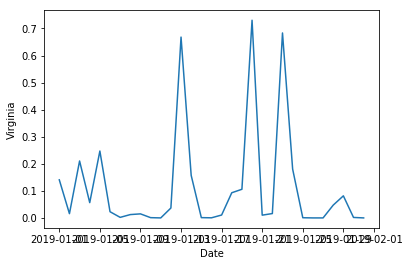

In [9]:
#Visualization for Stationarity from  to 01-01-2019 to 31-01-2019

plt.xlabel("Date")
plt.ylabel("Virginia")
plt.plot(east1)

**2.1. Rolling Mean and Rolling Standard Deviation For Virginia**

In [10]:
#rolmean and rolstandard deviation for measure stationarity with the time windows for 12 days

rolmean = east1.rolling(window = 12).mean()

rolstd = east1.rolling(window = 12).std()

print(rolmean,rolstd)

            Virginia
Date                
2019-01-01       NaN
2019-01-02       NaN
2019-01-03       NaN
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
2019-01-07       NaN
2019-01-08       NaN
2019-01-09       NaN
2019-01-10       NaN
2019-01-11       NaN
2019-01-12  0.063358
2019-01-13  0.107322
2019-01-14  0.119110
2019-01-15  0.101667
2019-01-16  0.096990
2019-01-17  0.077282
2019-01-18  0.083123
2019-01-19  0.091772
2019-01-20  0.151618
2019-01-21  0.151222
2019-01-22  0.152484
2019-01-23  0.209442
2019-01-24  0.221432
2019-01-25  0.165801
2019-01-26  0.152702
2019-01-27  0.152613
2019-01-28  0.156521
2019-01-29  0.162427
2019-01-30  0.154822
2019-01-31  0.146003             Virginia
Date                
2019-01-01       NaN
2019-01-02       NaN
2019-01-03       NaN
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
2019-01-07       NaN
2019-01-08       NaN
2019-01-09       NaN
2019-01-10       NaN
2019-01-11       NaN
2019-01-12  0.086691
2019-01-13  0

**2.2. Data Visualization for Rolling Mean and Standard Deviation**

No handles with labels found to put in legend.


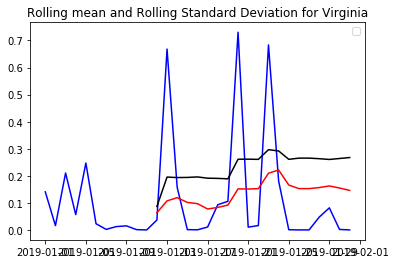

In [11]:
# Data Visualization of rolmean and rolstd

#(Raw/original data = Blue, Rolling Mean = Yellow, Rolling Std = "Red")
raw = plt.plot(east1, color ="blue")
mean = plt.plot(rolmean, color = "red")
std = plt.plot(rolstd, color = "black")
plt.legend(loc="best")
plt.title("Rolling mean and Rolling Standard Deviation for Virginia")
plt.show(block=False)

**2.3. Augmented Dickey Fuller Test**

In [12]:
x = east1["Virginia"].values
result = adfuller(x)
print("ADF Statistics: %f" % result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistics: -5.272537
p-value: 0.000006
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621


**3. Processings for ARIMA Model**

In [13]:
Variables = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/merg_avg.csv")
Virginia = Variables["Virginia"]
Virginia

0     0.140680
1     0.015728
2     0.210388
3     0.056505
4     0.247184
5     0.022913
6     0.002039
7     0.012330
8     0.014951
9     0.000971
10    0.000000
11    0.036602
12    0.668252
13    0.157184
14    0.001068
15    0.000388
16    0.010680
17    0.093010
18    0.105825
19    0.730485
20    0.010194
21    0.016117
22    0.683495
23    0.180485
24    0.000680
25    0.000000
26    0.000000
27    0.047282
28    0.081553
29    0.001748
30    0.000000
Name: Virginia, dtype: float64

**3.1. Log/Exponential form**

In [14]:
#log/ exponential values for ARIMA Model

virprec =np.log(Virginia)
virprec

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0    -1.961270
1    -4.152303
2    -1.558800
3    -2.873429
4    -1.397620
5    -3.776067
6    -6.195377
7    -4.395712
8    -4.202947
9    -6.937314
10        -inf
11   -3.307654
12   -0.403089
13   -1.850335
14   -6.842004
15   -7.853604
16   -4.539419
17   -2.375051
18   -2.245966
19   -0.314046
20   -4.585939
21   -4.127911
22   -0.380536
23   -1.712105
24   -7.293989
25        -inf
26        -inf
27   -3.051635
28   -2.506497
29   -6.349527
30        -inf
Name: Virginia, dtype: float64

In [15]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/log_prec_vir.csv"
log_prec_vir = pd.read_csv(filename)
log_prec_vir

,log_Prec_Vir
0,-1.961270
1,-4.152303
2,-1.558800
3,-2.873429
4,-1.397620
5,-3.776067
6,-6.195377
7,-4.395712
8,-4.202947
9,-6.937314


**3.2. Visualization of the Exponential values**

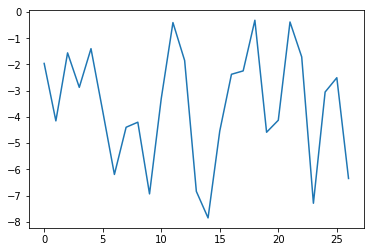

In [16]:
plt.plot(log_prec_vir)
plt.show()

**3.3. Correlations**

**3.3.1. AutoCorrelation**

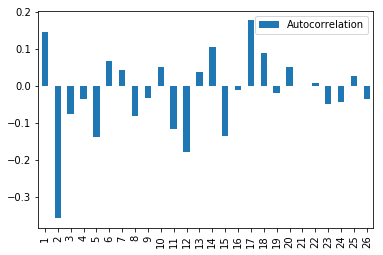

In [17]:
acf_1 = acf(log_prec_vir)[1:27]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

**3.3.2. Partial Autocorrelation**

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


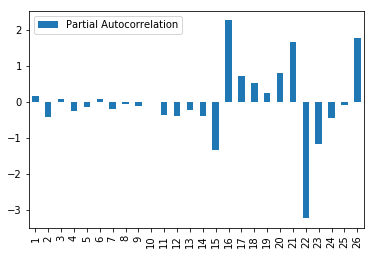

In [18]:
pacf_1 = pacf(log_prec_vir)[1:27]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ["Partial Autocorrelation"]
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

**4. ARIMA Model**

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -63.705
Method:                           css   S.D. of innovations              2.805
Date:                Wed, 20 Nov 2019   AIC                            131.411
Time:                        06:15:01   BIC                            133.927
Sample:                             1   HQIC                           132.135
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1688      0.550     -0.307      0.761      -1.247       0.909


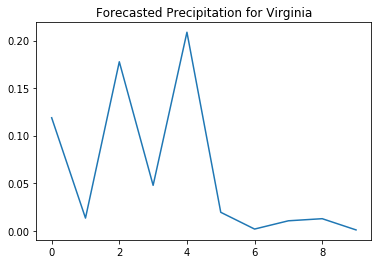

In [19]:
prec_matrix = log_prec_vir.as_matrix()
model = ARIMA(prec_matrix, order =(0,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
predictions = model_fit.predict(1,10, typ ='levels')
predictions
predictionsadjusted = np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Precipitation for Virginia')
plt.show()

                                        West U.S.A - California

**1. Data Preparation**

In [20]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/DD/california_19.csv"
cal = pd.read_csv(filename,header = None)
cal.fillna(0, inplace=True)
#vir['DataFrame Column']=pd.to_numeric(vir['DataFrame Column'],errors='coerce')
cal.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184
0,Date,ANGWIN PACIFIC UNION COLLEGE,BIG BAR 4 E,ASPENDELL,CALISTOGA,CALLAHAN,CLOVERDALE,COPCO #1 DAM,EUREKA WFO WOODLEY IS,FT BRAGG 5 N,FT JONES RS,FT ROSS,GASQUET RS,0,GRATON,HAPPY CAMP RS,HEALDSBURG,KENTFIELD,LAVA BEDS NAT MON,MT HEBRON RS,MUIR WOODS,0,NAPA STATE HOSPITAL,OAK KNOLL W C,OCCIDENTAL,PETALUMA AP,POTTER VALLEY POWERHOUSE,SAINT HELENA,SAN RAFAEL CIVIC CTR,SANTA ROSA,SCOTIA,SONOMA,TRINITY RVR HATCHERY,TULELAKE,UKIAH 4 WSW,VALLEJO,WEAVERVILLE,0,WILLOW CREEK 1 NW,YREKA,SACRAMENTO DRAINAGE,ADIN RS,ALTURAS,AUBURN,BLUE CANYON NYACK AP,BOWMAN DAM,BUCKHORN,BUCKS CREEK,CANYON DAM,CHESTER,CHICO UNIV FARM,COLEMAN FISHERIES STN,COLFAX,COLGATE POWERHOUSE,COLUSA 2 SSW,DAVIS 2 WSW EXP FARM,DE SABLA,DOWNIEVILLE,DUNSMUIR TRTMT PL,FAIRFIELD,FALL RVR MILLS,FORESTHILL RS,0,0,GEORGETOWN RS,GOLD RUN 2 SW,GRASS VALLEY #2,HARRY L ENGLEBRIGHT DAM,HAT CREEK,JESS VALLEY,KELSEY 1 N,LAKE SOLANO,MANZANITA LAKE,0,MARKLEY COVE,MARYSVILLE AP (ASOS),MCCLOUD,0,MIDDLETOWN,MINERAL,0,MT SHASTA,NEVADA CITY,NICOLAUS #2,ORLAND,OROVILLE,PACIFIC HOUSE,PIT RVR PH 5,PLACERVILLE 3 ENE,0,PORTOLA,QUINCY,RED BLUFF MUNI AP,REDDING AP,SACRAMENTO AP ASOS,SACRAMENTO 5ESE,SHASTA DAM,SIERRAVILLE RS,0,STONY GORGE RSVR,STRAWBERRY VALLEY,VACAVILLE NUT TREE AP ASOS,VINTON,VOLTA PH,WHISKEYTOWN RSVR,0,WILLOWS 6 W,WINTERS,WOODLAND 1 WNW,NORTHEAST,INTERIOR BASINS,BOCA,BODIE CALIFORNIA ST HISTORIC P,BRIDGEPORT,0,CEDARVILLE,DOYLE,DOYLE 4 SSE,FT BIDWELL,SUSANVILLE 2SW,0,TAHOE CITY,TAHOMA,S LAKE TAHOE AP,TRUCKEE-TAHOE AP,VERDI 2W,CENTRAL,COAST DRAINAGE,BEN LOMOND #4,BERKELEY,BIG SUR STN,0,CARMEL VALLEY,CONCORD BUCHANAN FLD,CONCORD WWTP,FREMONT,GILROY,HALF MOON BAY,HAYWARD AIR TERMINAL,HEARST CASTLE,HOLLISTER 2,0,KING CITY,LIVERMORE MUNI AP,LIVERMORE,LOS GATOS,MARTINEZ WTP,MONTEREY,MONTEREY WFO,MORRO BAY FIRE DEPT,MT DIABLO JUNCTION,MT HAMILTON,NAPA CO AP,NEWARK,OAKLAND MUSEUM,PASO ROBLES,PASO ROBLES MUNI AP,PINNACLES NM,0,REDWOOD CITY,RICHMOND,SALINAS AP,SALINAS DAM,SAN CLEMENTE DAM,0,SAN FRANCISCO OCEANSIDE,SAN FRANCISCO INTL AP,SAN FRANCISCO DWTN,SAN JOSE,SAN LUIS OBISPO POLY,SANTA CRUZ,SANTA MARGARITA BOOST,SANTA ROSA SONOMA CO AP,SKYLINE RIDGE PRESERVE,UPPER SAN LEANDRO FILTERS,WATSONVILLE WTR WKS,SAN JOAQUIN,DRAINAGE,ACAMPO 5NE,ANTIOCH PUMPING PLT #3,ARVIN,0,ASH MTN,0,AUBERRY 2 NW
1,1,0,-,0,-,-,0,0,0,0,-,0,0,0,0,-,-,0,-,-,*,0,0,-,0,0,0,0,-,0,0,-,-,0,-,0,0,0,-,0,0,0,-,-,0,-,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,0,0,*,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,-,*,0,0,0,0,0,0,0,-,-,0,-,-,-,0,0,0,0,T,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,-,0,0,0,0,-,0,0,0,0,0.03,0,0,0,0,0,0,*,0,0,0,0,0,*,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,*,0,0
2,2,0,-,-,0,-,0,0,0,0,-,0,*,0,0,-,-,0,-,-,0,a,0,-,0,0,0,0,-,0,0,0,-,0,-,0,0,0,-,0,0,0,-,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,*,0,0,-,0,0,0,0,0,0,0,-,0,0,0,0,0,0,*,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,-,*,0,0,0,0,0,0,0,0,-,0,0,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,0,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,*,0,0
3,3,0,-,-,-,-,0,0,0,0,-,0,*,0,0,-,-,0,-,-,0,0,0,-,0,0,0.01,0,-,0,0,0,-,0,-,0,0,0,-,0,0,0,-,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,*,0,0,-,0,0,0,0,0,0,0,-,0,0,0,0,0,0,*,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,0,*,0,0,0,0,0,0,0,0,-,0,0,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
export_excel = cal.to_excel (r'C:/Users/Deepan Ilangkamban R/Desktop/DD/export_west.xlsx', index = None, header=True)

In [22]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/west_cal.csv"
west = pd.read_csv(filename)
west.head(5)

,0,1,4,6,7,8,9,11,12,14,17,19,20,22,24,25,26,27,29,30,31,33,34,35,36,39,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,70,71,72,74,75,76,78,81,82,83,84,85,86,87,88,90,91,92,93,94,95,96,99,100,101,102,103,106,107,108,111,115,118,119,121,122,123,124,125,128,129,130,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,166,167,168,169,170,171,172,173,174,175,178,179,180,182,184
0,Date,ANGWIN PACIFIC UNION COLLEGE,CALISTOGA,CLOVERDALE,COPCO #1 DAM,EUREKA WFO WOODLEY IS,FT BRAGG 5 N,FT ROSS,GASQUET RS,GRATON,KENTFIELD,MT HEBRON RS,MUIR WOODS,NAPA STATE HOSPITAL,OCCIDENTAL,PETALUMA AP,POTTER VALLEY POWERHOUSE,SAINT HELENA,SANTA ROSA,SCOTIA,SONOMA,TULELAKE,UKIAH 4 WSW,VALLEJO,WEAVERVILLE,YREKA,ADIN RS,AUBURN,BLUE CANYON NYACK AP,BOWMAN DAM,BUCKHORN,BUCKS CREEK,CANYON DAM,CHESTER,CHICO UNIV FARM,COLEMAN FISHERIES STN,COLFAX,COLGATE POWERHOUSE,COLUSA 2 SSW,DAVIS 2 WSW EXP FARM,DE SABLA,DOWNIEVILLE,DUNSMUIR TRTMT PL,FAIRFIELD,FALL RVR MILLS,GEORGETOWN RS,GOLD RUN 2 SW,GRASS VALLEY #2,HARRY L ENGLEBRIGHT DAM,HAT CREEK,JESS VALLEY,KELSEY 1 N,LAKE SOLANO,MANZANITA LAKE,MARKLEY COVE,MARYSVILLE AP (ASOS),MCCLOUD,MIDDLETOWN,MT SHASTA,NEVADA CITY,NICOLAUS #2,ORLAND,OROVILLE,PACIFIC HOUSE,PIT RVR PH 5,PLACERVILLE 3 ENE,PORTOLA,QUINCY,RED BLUFF MUNI AP,REDDING AP,SACRAMENTO AP ASOS,SACRAMENTO 5ESE,SHASTA DAM,STONY GORGE RSVR,STRAWBERRY VALLEY,VACAVILLE NUT TREE AP ASOS,VINTON,VOLTA PH,WILLOWS 6 W,WINTERS,WOODLAND 1 WNW,BOCA,CEDARVILLE,FT BIDWELL,SUSANVILLE 2SW,TAHOE CITY,TAHOMA,S LAKE TAHOE AP,TRUCKEE-TAHOE AP,VERDI 2W,BEN LOMOND #4,BERKELEY,BIG SUR STN,CARMEL VALLEY,CONCORD BUCHANAN FLD,CONCORD WWTP,FREMONT,GILROY,HALF MOON BAY,HAYWARD AIR TERMINAL,HEARST CASTLE,HOLLISTER 2,KING CITY,LIVERMORE MUNI AP,LIVERMORE,LOS GATOS,MARTINEZ WTP,MONTEREY,MONTEREY WFO,MORRO BAY FIRE DEPT,MT DIABLO JUNCTION,MT HAMILTON,NAPA CO AP,NEWARK,OAKLAND MUSEUM,PASO ROBLES,PASO ROBLES MUNI AP,REDWOOD CITY,RICHMOND,SALINAS AP,SALINAS DAM,SAN CLEMENTE DAM,SAN FRANCISCO INTL AP,SAN FRANCISCO DWTN,SAN JOSE,SAN LUIS OBISPO POLY,SANTA CRUZ,SANTA MARGARITA BOOST,SANTA ROSA SONOMA CO AP,SKYLINE RIDGE PRESERVE,UPPER SAN LEANDRO FILTERS,WATSONVILLE WTR WKS,ACAMPO 5NE,ANTIOCH PUMPING PLT #3,ARVIN,ASH MTN,AUBERRY 2 NW
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0,0,0,0,0,0.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
west = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/west_cal.csv",parse_dates= True,index_col=0, dayfirst = True)
#pd.to_datetime('1/1/2019', dayfirst=True)
west.head(5)

,1,4,6,7,8,9,11,12,14,17,19,20,22,24,25,26,27,29,30,31,33,34,35,36,39,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,64,65,66,67,68,69,70,71,72,74,75,76,78,81,82,83,84,85,86,87,88,90,91,92,93,94,95,96,99,100,101,102,103,106,107,108,111,115,118,119,121,122,123,124,125,128,129,130,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,166,167,168,169,170,171,172,173,174,175,178,179,180,182,184
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Date,ANGWIN PACIFIC UNION COLLEGE,CALISTOGA,CLOVERDALE,COPCO #1 DAM,EUREKA WFO WOODLEY IS,FT BRAGG 5 N,FT ROSS,GASQUET RS,GRATON,KENTFIELD,MT HEBRON RS,MUIR WOODS,NAPA STATE HOSPITAL,OCCIDENTAL,PETALUMA AP,POTTER VALLEY POWERHOUSE,SAINT HELENA,SANTA ROSA,SCOTIA,SONOMA,TULELAKE,UKIAH 4 WSW,VALLEJO,WEAVERVILLE,YREKA,ADIN RS,AUBURN,BLUE CANYON NYACK AP,BOWMAN DAM,BUCKHORN,BUCKS CREEK,CANYON DAM,CHESTER,CHICO UNIV FARM,COLEMAN FISHERIES STN,COLFAX,COLGATE POWERHOUSE,COLUSA 2 SSW,DAVIS 2 WSW EXP FARM,DE SABLA,DOWNIEVILLE,DUNSMUIR TRTMT PL,FAIRFIELD,FALL RVR MILLS,GEORGETOWN RS,GOLD RUN 2 SW,GRASS VALLEY #2,HARRY L ENGLEBRIGHT DAM,HAT CREEK,JESS VALLEY,KELSEY 1 N,LAKE SOLANO,MANZANITA LAKE,MARKLEY COVE,MARYSVILLE AP (ASOS),MCCLOUD,MIDDLETOWN,MT SHASTA,NEVADA CITY,NICOLAUS #2,ORLAND,OROVILLE,PACIFIC HOUSE,PIT RVR PH 5,PLACERVILLE 3 ENE,PORTOLA,QUINCY,RED BLUFF MUNI AP,REDDING AP,SACRAMENTO AP ASOS,SACRAMENTO 5ESE,SHASTA DAM,STONY GORGE RSVR,STRAWBERRY VALLEY,VACAVILLE NUT TREE AP ASOS,VINTON,VOLTA PH,WILLOWS 6 W,WINTERS,WOODLAND 1 WNW,BOCA,CEDARVILLE,FT BIDWELL,SUSANVILLE 2SW,TAHOE CITY,TAHOMA,S LAKE TAHOE AP,TRUCKEE-TAHOE AP,VERDI 2W,BEN LOMOND #4,BERKELEY,BIG SUR STN,CARMEL VALLEY,CONCORD BUCHANAN FLD,CONCORD WWTP,FREMONT,GILROY,HALF MOON BAY,HAYWARD AIR TERMINAL,HEARST CASTLE,HOLLISTER 2,KING CITY,LIVERMORE MUNI AP,LIVERMORE,LOS GATOS,MARTINEZ WTP,MONTEREY,MONTEREY WFO,MORRO BAY FIRE DEPT,MT DIABLO JUNCTION,MT HAMILTON,NAPA CO AP,NEWARK,OAKLAND MUSEUM,PASO ROBLES,PASO ROBLES MUNI AP,REDWOOD CITY,RICHMOND,SALINAS AP,SALINAS DAM,SAN CLEMENTE DAM,SAN FRANCISCO INTL AP,SAN FRANCISCO DWTN,SAN JOSE,SAN LUIS OBISPO POLY,SANTA CRUZ,SANTA MARGARITA BOOST,SANTA ROSA SONOMA CO AP,SKYLINE RIDGE PRESERVE,UPPER SAN LEANDRO FILTERS,WATSONVILLE WTR WKS,ACAMPO 5NE,ANTIOCH PUMPING PLT #3,ARVIN,ASH MTN,AUBERRY 2 NW
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,0,0,0,0,0,0.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
export_excel = west.to_excel (r'C:/Users/Deepan Ilangkamban R/Desktop/DD/export_west_merge.xlsx', index = None, header=True)

In [25]:
west1 = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/west_avg.csv",parse_dates= True,index_col=0, dayfirst = True)
print(west1)

            California
Date                  
2019-01-01        0.00
2019-01-02        0.00
2019-01-03        0.00
2019-01-04        0.00
2019-01-05        0.23
2019-01-06        0.95
2019-01-07        0.76
2019-01-08        0.15
2019-01-09        0.51
2019-01-10        0.18
2019-01-11        0.06
2019-01-12        0.07
2019-01-13        0.01
2019-01-14        0.08
2019-01-15        0.41
2019-01-16        1.13
2019-01-17        1.25
2019-01-18        0.26
2019-01-19        0.20
2019-01-20        0.39
2019-01-21        0.33
2019-01-22        0.06
2019-01-23        0.02
2019-01-24        0.02
2019-01-25        0.00
2019-01-26        0.00
2019-01-27        0.00
2019-01-28        0.05
2019-01-29        0.01
2019-01-30        0.15
2019-01-31        0.00


**2. Analysis for Stationarity**

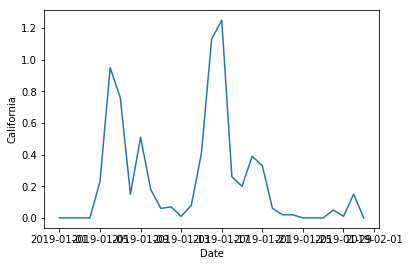

In [26]:
#Visualization for Stationarity from  to 01-01-2019 to 31-01-2019

plt.xlabel("Date")
plt.ylabel("California")
plt.plot(west1)

**2.1. Rolling Mean and Rolling Standard Deviation**

In [27]:
#rolmean and rolstandard deviation for measure stationarity with the time windows for 12 days

rolmean = west1.rolling(window = 12).mean()

rolstd = west1.rolling(window = 12).std()

print(rolmean,rolstd)

            California
Date                  
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
2019-01-06         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-12    0.242500
2019-01-13    0.243333
2019-01-14    0.250000
2019-01-15    0.284167
2019-01-16    0.378333
2019-01-17    0.463333
2019-01-18    0.405833
2019-01-19    0.359167
2019-01-20    0.379167
2019-01-21    0.364167
2019-01-22    0.354167
2019-01-23    0.350833
2019-01-24    0.346667
2019-01-25    0.345833
2019-01-26    0.339167
2019-01-27    0.305000
2019-01-28    0.215000
2019-01-29    0.111667
2019-01-30    0.102500
2019-01-31    0.085833             California
Date                  
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
2019-01-06         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09 

**2.2. Visualization of the Rolling Means and Standard Deviations**

No handles with labels found to put in legend.


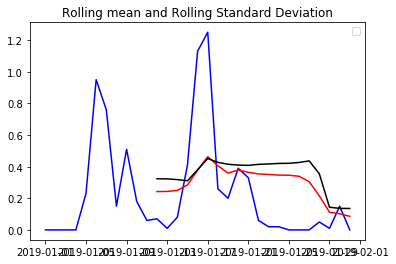

In [28]:
# Data Visualization of rolmean and rolstd

#(Raw/original data = Blue, Rolling Mean = Yellow, Rolling Std = "Red")
raw = plt.plot(west1, color ="blue")
mean = plt.plot(rolmean, color = "red")
std = plt.plot(rolstd, color = "black")
plt.legend(loc="best")
plt.title("Rolling mean and Rolling Standard Deviation")
plt.show(block=False)

**2.3. Augmented Dickey Fuller Test for Stationarity**

In [29]:
x = west1["California"].values
result = adfuller(x)
print("ADF Statistics: %f" % result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -3.322119
p-value: 0.013918
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


**3. Preprocessing Data for ARIMA Model**

In [30]:
Variables = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/west_avg.csv")
California = Variables["California"]
California

0     0.00
1     0.00
2     0.00
3     0.00
4     0.23
5     0.95
6     0.76
7     0.15
8     0.51
9     0.18
10    0.06
11    0.07
12    0.01
13    0.08
14    0.41
15    1.13
16    1.25
17    0.26
18    0.20
19    0.39
20    0.33
21    0.06
22    0.02
23    0.02
24    0.00
25    0.00
26    0.00
27    0.05
28    0.01
29    0.15
30    0.00
Name: California, dtype: float64

In [31]:
#log

Calprec =np.log(California)
Calprec

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0         -inf
1         -inf
2         -inf
3         -inf
4    -1.469676
5    -0.051293
6    -0.274437
7    -1.897120
8    -0.673345
9    -1.714798
10   -2.813411
11   -2.659260
12   -4.605170
13   -2.525729
14   -0.891598
15    0.122218
16    0.223144
17   -1.347074
18   -1.609438
19   -0.941609
20   -1.108663
21   -2.813411
22   -3.912023
23   -3.912023
24        -inf
25        -inf
26        -inf
27   -2.995732
28   -4.605170
29   -1.897120
30        -inf
Name: California, dtype: float64

In [32]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/log_prec_cal.csv"
log_prec_cal = pd.read_csv(filename)
log_prec_cal

,log_prec_cal
0,-1.771957
1,-0.356675
2,-0.579818
3,-2.207275
4,-0.994252
5,-2.040221
6,-2.995732
7,-2.995732
8,-4.605170
9,-2.813411


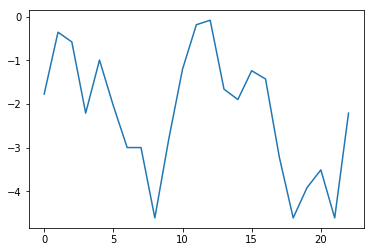

In [33]:
plt.plot(log_prec_cal)
plt.show()

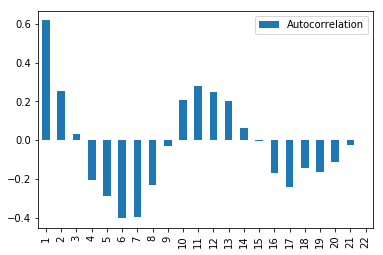

In [34]:
acf_1 = acf(log_prec_cal)[1:27]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

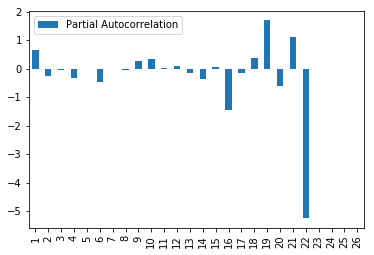

In [35]:
pacf_1 = pacf(log_prec_cal)[1:27]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ["Partial Autocorrelation"]
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

**4. ARIMA Model**

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -35.795
Method:                           css   S.D. of innovations              1.231
Date:                Wed, 20 Nov 2019   AIC                             75.590
Time:                        06:15:07   BIC                             77.772
Sample:                             1   HQIC                            76.104
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0198      0.263     -0.075      0.941      -0.534       0.495


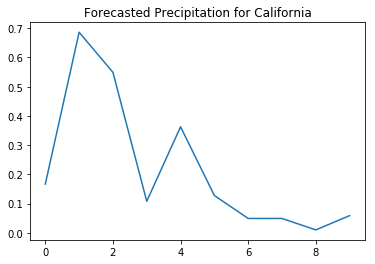

In [36]:
prec_matrix = log_prec_cal.as_matrix()
model = ARIMA(prec_matrix, order =(0,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
predictions = model_fit.predict(1,10, typ ='levels')
predictions
predictionsadjusted = np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Precipitation for California')
plt.show()

                                            North U.S.A - North Dakoda

**1. Data Preparation**

In [37]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/DD/Dak_19.csv"
dak = pd.read_csv(filename,header = None)
dak.fillna(0, inplace=True)
#vir['DataFrame Column']=pd.to_numeric(vir['DataFrame Column'],errors='coerce')
dak.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,Date,AMBROSE 3 N,CROSBY,FORTUNA 1 W,FOXHOLM 7 N,KENMARE 1 WSW,MINOT INTL AP,MINOT EXP STN,MOHALL,PLAZA,SHERWOOD,WILLISTON,WILLISTON SLOULIN FLD,WILLISTON EXP FARM,NORTH CENTRAL,BALFOUR 2 SW,BOTTINEAU,DRAKE 9 NE,ESMOND 9 NNW,LAKE METIGOSHE SP,0,LANSFORD,MINNEWAUKAN,ROLETTE 3SE,RUGBY,TOWNER 2 NE,UPHAM 3 N,VELVA,0,WILLOW CITY,NORTHEAST,ADAMS 7 SSW,CANDO 1E,CAVALIER 7NW,GRAND FORKS INTL AP,GRAND FORKS UNIV (NWS),LANGDON EXP FARM,PEMBINA,PETERSBURG 2 N,WEST CENTRAL,DICKINSON RCH HQ,DUNN CENTER,GARRISON,GOLDEN VALLEY 9S,0,GRASSY BUTTE 2ENE,KEENE 3S,KILLDEER,MARSHALL,MAX,TAYLOR 7 NNW,TURTLE LAKE,UNDERWOOD,WASHBURN,WATFORD CITY,0,WATFORD CITY 14S,CENTRAL,CARRINGTON 4 N,0,COURTENAY 1 NW,HARVEY 4NE,JAMESTOWN MUNI AP,JAMESTOWN STATE HOSP,MC CLUSKY,MC HENRY 3W,MONTPELIER,STEELE 4N,STREETER 5 NW,SYKESTON,EAST CENTRAL,BALDHILL DAM,CASSELTON AGRONOMY FARM,CHAFFEE 5 NE,FARGO HECTOR INTL AP,FARGO 3S,LITCHVILLE 2NW,MAYVILLE,SOUTHWEST,BOWMAN,THEODORE ROOSEVELT AP,DICKINSON,HETTINGER EXP STN,0,MEDORA,NEW ENGLAND,REEDER,RHAME 16S,RICHARDTON ABBEY,SOUTH CENTRAL,BISMARCK 2.4 NNW,BISMARCK WFO,BISMARCK MUNI AP,ELGIN,FLASHER,HAZELTON 4NW,0,HEART BUTTE DAM,HEBRON,MANDAN EXP STN,MOFFIT 3 SE,NEW SALEM 5NW,PRETTY ROCK,SHIELDS,WATAUGA S DAK 8 N,SOUTHEAST,ASHLEY,EDGELEY 3WNW,ELLENDALE,ENDERLIN 2W,FORMAN 5 SSE,FULLERTON 1 ESE,LA MOURE,LIDGERWOOD,LISBON,MC LEOD 3 E,NAPOLEON,OAKES
1,1,0,0.06,0,-,0,T,0,0,-,0,T,0.01,0,0,0,0,0,0,*,0,0,-,0,-,0,0,0,0,-,0,-,-,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,-,0,0,0,0,0,0,T,0,0,0,T,0,0,0,-,0,0,0,0,0,0,0,0,T,0,0,a,0,0,0,-,0,0,0,T,0.02,0,0,0,0,0,0,-,-,0,0,0,-,0,0,-,0,0,0,0,0,0,0,T,0,-
2,2,0,0,0,-,0,T,0,0,-,0,0,0,0,0,0,0.04,0.01,T,*,0,T,-,0,-,0,0,0,0,-,0,-,-,0.02,0.03,0.02,-,0.05,0,0,0,-,0,0,0,T,0,T,T,T,0,0,T,0,*,0,-,0,0,0,0,0,T,0,T,0,0,0,0,-,0,-,0,0,0.02,0.02,0,0,0,0,0,T,0.02,0,0,0,0,-,0,0,T,0.01,0,0,T,0,0,T,T,-,-,0,T,0,-,0,0,-,0,0,0,0,0,T,0,0,0,-
3,3,0,0,0,-,0,0,0,0,-,0,0,0,T,0,0,0,0,0,0.1,a,T,-,0,-,0,0,0,0,-,0,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,-,0,0,0,0,0,0,T,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,-,0,0,-,0,0,0,0,0,0,T,T,0.02,-
4,4,0,0,0,-,0,0,0,0,-,0,0,0,T,0,0,0,0,0,0,0,0,-,0,-,0,0,0,0,-,0,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,a,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,-
5,5,0,0,0,-,0,0,0,0,-,T,0,0,T,0,0,0,0,0,*,0,0,-,0,-,0,0,0,0,-,0,-,-,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,-,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,-
6,6,0,0,0,-,T,T,0,0,-,T,0,T,T,0,0,0,0,0,*,0,T,-,0,-,0,0,0,0,-,0,-,-,0,0.01,0.01,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,-,T,0,0,0,0,0,0,T,0,-,0,0,T,T,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,T,0,0,0,0,0,0,T,-,-,0,T,0,-,0,0,-,0,0,0,0,0,0,0,0,0,-
7,7,0,0,0,-,0,0,0,0,-,0,T,0,T,0,0,0.06,T,T,0.18,a,0.02,-,0.1,-,T,0.02,0,0,-,0,-,-,0.11,0.02,0.01,0.24,0.16,0.03,0,0,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,T,0,0,T,0.29,T,0,0,-,0.01,0,0.02,0.02,0,T,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,T,T,0,0,T,-,-,0,0,0,-,0,0,-,0,0.03,0,-,T,T,T,0,T,-
8,8,0,0,0,-,0,T,0,0,-,0,0,0,T,0,0,0,0,0,0,0,T,-,0,-,0,0,0,0,-,0,-,-,T,T,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,T,0,0,T,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,-
9,9,0,0,0,-,0,0,0,0,-,0,0,0,T,0,0,0,0,0,*,0,0,-,0,-,0,0,0,0,-,0,-,-,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,-


In [38]:
#exporting the cleaned csv_to_excel inorder to make the deep analysis for the cleaned data

export_excel = vir.to_excel (r'C:/Users/Deepan Ilangkamban R/Desktop/DD/export_north.xlsx', index = None, header=True)

In [39]:
north1 = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/north_dak.csv",parse_dates= True,index_col=0, dayfirst = True)
print(north1)

            North_Dakota
Date                    
2019-01-01          0.14
2019-01-02          0.02
2019-01-03          0.21
2019-01-04          0.06
2019-01-05          0.25
2019-01-06          0.02
2019-01-07          0.00
2019-01-08          0.01
2019-01-09          0.02
2019-01-10          0.00
2019-01-11          0.00
2019-01-12          0.04
2019-01-13          0.67
2019-01-14          0.16
2019-01-15          0.00
2019-01-16          0.00
2019-01-17          0.01
2019-01-18          0.09
2019-01-19          0.11
2019-01-20          0.74
2019-01-21          0.01
2019-01-22          0.02
2019-01-23          0.69
2019-01-24          0.18
2019-01-25          0.00
2019-01-26          0.00
2019-01-27          0.00
2019-01-28          0.05
2019-01-29          0.08
2019-01-30          0.00
2019-01-31          0.00


**2. Analysis for Stationarity**

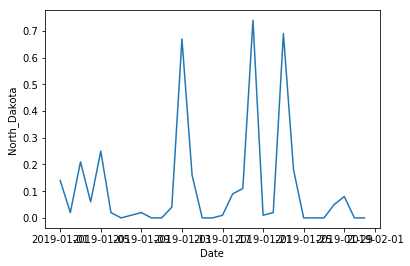

In [40]:
#Visualization for Stationarity from  to 01-01-2019 to 31-01-2019

plt.xlabel("Date")
plt.ylabel("North_Dakota")
plt.plot(north1)

**2.1. Rolling Mean and Rolling Standard Deviation**

In [41]:
rolmean = north1.rolling(window = 12).mean()

rolstd = north1.rolling(window = 12).std()

print(rolmean,rolstd)

            North_Dakota
Date                    
2019-01-01           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-05           NaN
2019-01-06           NaN
2019-01-07           NaN
2019-01-08           NaN
2019-01-09           NaN
2019-01-10           NaN
2019-01-11           NaN
2019-01-12      0.064167
2019-01-13      0.108333
2019-01-14      0.120000
2019-01-15      0.102500
2019-01-16      0.097500
2019-01-17      0.077500
2019-01-18      0.083333
2019-01-19      0.092500
2019-01-20      0.153333
2019-01-21      0.152500
2019-01-22      0.154167
2019-01-23      0.211667
2019-01-24      0.223333
2019-01-25      0.167500
2019-01-26      0.154167
2019-01-27      0.154167
2019-01-28      0.158333
2019-01-29      0.164167
2019-01-30      0.156667
2019-01-31      0.147500             North_Dakota
Date                    
2019-01-01           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-05           NaN


**2.2. Visualization of Rolling Mean and Standard Deviation**

No handles with labels found to put in legend.


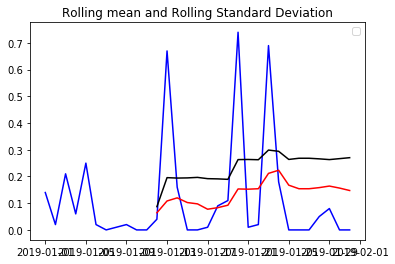

In [42]:
#(Raw/original data = Blue, Rolling Mean = Yellow, Rolling Std = "Red")
raw = plt.plot(north1, color ="blue")
mean = plt.plot(rolmean, color = "red")
std = plt.plot(rolstd, color = "black")
plt.legend(loc="best")
plt.title("Rolling mean and Rolling Standard Deviation")
plt.show(block=False)

**2.3. Augmented Dickey Fuller Test**

In [43]:
x = north1["North_Dakota"].values
result = adfuller(x)
print("ADF Statistics: %f" % result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -5.243068
p-value: 0.000007
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621


**3. Preprocessing Data**

In [44]:
Variables = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/north_dak.csv")
Dakota = Variables["North_Dakota"]
Dakota

0     0.14
1     0.02
2     0.21
3     0.06
4     0.25
5     0.02
6     0.00
7     0.01
8     0.02
9     0.00
10    0.00
11    0.04
12    0.67
13    0.16
14    0.00
15    0.00
16    0.01
17    0.09
18    0.11
19    0.74
20    0.01
21    0.02
22    0.69
23    0.18
24    0.00
25    0.00
26    0.00
27    0.05
28    0.08
29    0.00
30    0.00
Name: North_Dakota, dtype: float64

In [45]:
#log

Dakprec =np.log(Dakota)
Dakprec

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0    -1.966113
1    -3.912023
2    -1.560648
3    -2.813411
4    -1.386294
5    -3.912023
6         -inf
7    -4.605170
8    -3.912023
9         -inf
10        -inf
11   -3.218876
12   -0.400478
13   -1.832581
14        -inf
15        -inf
16   -4.605170
17   -2.407946
18   -2.207275
19   -0.301105
20   -4.605170
21   -3.912023
22   -0.371064
23   -1.714798
24        -inf
25        -inf
26        -inf
27   -2.995732
28   -2.525729
29        -inf
30        -inf
Name: North_Dakota, dtype: float64

In [46]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/log_prec_dak.csv"
log_prec_dak = pd.read_csv(filename)
log_prec_dak

,log_prec_dak
0,-1.966113
1,-3.912023
2,-1.560648
3,-2.813411
4,-1.386294
5,-3.912023
6,-4.605170
7,-3.912023
8,-3.218876
9,-0.400478


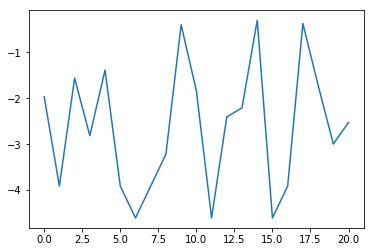

In [47]:
plt.plot(log_prec_dak)
plt.show()

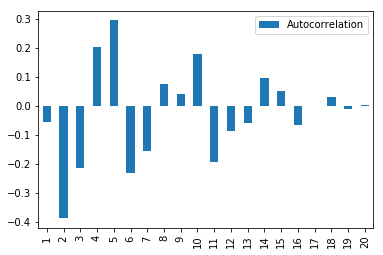

In [48]:
acf_1 = acf(log_prec_dak)[1:27]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

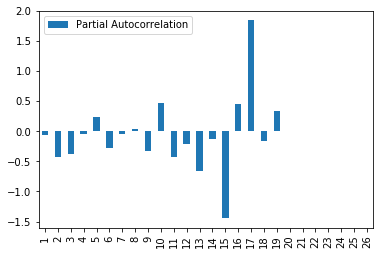

In [49]:
pacf_1 = pacf(log_prec_dak)[1:27]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ["Partial Autocorrelation"]
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

**4. ARIMA Model**

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   20
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -42.503
Method:                           css   S.D. of innovations              2.026
Date:                Wed, 20 Nov 2019   AIC                             89.007
Time:                        06:15:10   BIC                             90.998
Sample:                             1   HQIC                            89.395
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0280      0.453     -0.062      0.951      -0.916       0.860


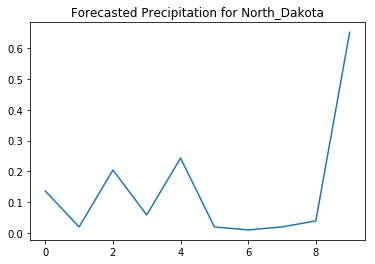

In [50]:
prec_matrix = log_prec_dak.as_matrix()
model = ARIMA(prec_matrix, order =(0,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
predictions = model_fit.predict(1,10, typ ='levels')
predictions
predictionsadjusted = np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Precipitation for North_Dakota')
plt.show()

                                                South U.S.A - Texas

**1. Data Preparation**

In [51]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/DD/texes_19.csv"
tex = pd.read_csv(filename,header = None)
tex.fillna(0, inplace=True)
#vir['DataFrame Column']=pd.to_numeric(vir['DataFrame Column'],errors='coerce')
tex.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,0.0,ABERNATHY,ADRIAN 6N,ALLISON,AMARILLO AP,AMARILLO 7ENE,ANDREWS 2,BIG SPRING 5NE,BIG SPRING FLD STN,BIG SPRING,BOOKER,BORGER,BOYS RCH,BRAVO,BROWNFIELD #2,BUSHLAND 1 WSW,CANADIAN 6NW,CANYON,CONLEN,CROSBYTON,DALHART,DARROUZETT,DENVER CITY,DIMMITT 2 N,DUMAS,FLOYDADA,FLOYDADA 9 SE,FOLLETT,FRIONA,GLAZIER,GRUVER,HAPPY 4NW,HART,HARTLEY,HEREFORD,HIGGINS,0,JERICHO,LAMESA 1 SSE,LEVELLAND,LIPSCOMB,LITTLEFIELD,LUBBOCK WFO,LUBBOCK 9 N,LUBBOCK INTL AP,MIDLAND INTL,MIDLAND 4 ENE,0,MOBEETIE 7 N,MORTON,MULESHOE #1,MULESHOE NTL WR,NOTLA 3 SE,OLTON,PAMPA #2,PAMPA 3E,PANHANDLE,PERRYTON,PERRYTON 21 S,PERRYTON 11 WNW,PLAINS,PLAINVIEW,PLAINVIEW WTR PRODUCTN,SANFORD DAM,SEMINOLE,SHALLOWATER,SILVERTON,SLATON,STRATFORD,TAHOKA,TEXLINE,TULIA,VEGA 2NW,VIGO PARK,WHITE DEER,WHITE RIVER RESERVOIR,LOW ROLLING PLAINS,ABILENE 6ESE,ABILENE RGNL AP,ANSON,ASPERMONT,BALLINGER 2 NW,BURKETT,CHILDRESS 2,CHILDRESS MUNI AP,CLARENDON,COLEMAN,CROWELL,DUMONT,FLOMOT 2E,FLOMOT 4 NE,GAIL,0,GLEN COVE 2 NE,GUTHRIE,HASKELL,HORDS CREEK DAM,JAYTON,KNAPP 2 SW,TUSCOLA 2NW,LAKE ALAN HENRY,LAKE KEMP,MATADOR,MEMPHIS,MERKEL 12 SW,MUNDAY 1W,NORTHFIELD,PADUCAH,PADUCAH 15 S,PADUCAH 10S,PITCHFORK RCH,POST,ROARING SPRINGS,ROSCOE,ROTAN,SANTA ANNA 12SSE,SEYMOUR 3NW,SHAMROCK #2,SNYDER,SPUR,STAMFORD 1,TRUSCOTT 3 W,TURKEY,VERNON,WICHITA FALLS MUNI AP,WINGATE,0,NORTH CENTRAL,ALBANY,ALVARADO 4NE,ALVORD 3 N,ANDICE 2 SW,ANTELOPE,AQUILLA 1 SSE,ARLINGTON SIX FLAGS,BARDWELL DAM,BENBROOK DAM,BONHAM 3NNE,BONITA 7NW,BOWIE,BRECKENRIDGE,BRIDGEPORT,BROWNWOOD 2ENE,BURLESON,CLEBURNE,0,COMMERCE 4SW,COOPER,CORSICANA,CRANFILLS GAP,0,CRAWFORD,0,CRESSON,DAL-FTW WSCMO AP,DALLAS FAA AP,DECATUR,DENTON 2 SE,FERRIS,FLORENCE,FORESTBURG 5 S,0,FT GRIFFIN,FT WORTH WSFO,FT WORTH NATURE CTR,FT WORTH BOTANIC GARDEN,FRISCO,GAINESVILLE 5 ENE,GATESVILLE,GEORGETOWN LAKE,0,GOLDTHWAITE 1 WSW
1,1.0,0,0,0,0.01,-,0,0,0,0,0,-,0,0,0,T,0,0,-,0,-,-,0,0,0,0,0,0,0,0,0,0,T,-,T,0,0,0,-,0,0,0,0,T,0,0,0,*,0,0,0,0,0,0,T,-,0,-,0,-,0,0,0,0,T,0,0,0,0,0,0,T,0,0,0,-,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,-,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,-,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,-,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,*,0,0
2,2.0,0,0,0,0,-,-,0,T,0,0,-,0,0,0,T,0,0,-,0,-,-,0,0,0,0,0,0,T,0,0,0,0,-,T,0,0,0,0,0,0,0,0,0,0,0,0,*,0,0,T,0,0,0,0,0,0,-,0,-,0,0,0,T,0,0,T,0,0,0,0,T,T,0,0,-,0,0,T,0.06,0,0,0,0,0,-,0.01,0,0,0,0,0,0,0,0,0,-,0,-,0,T,0,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,-,0,0,0,0,0,0,0.12,0,0,0,T,-,0,0.62,0,0.29,0.01,0.81,0.1,T,0,0,0.01,-,0,0,*,0,0.18,0.14,0.21,*,0,0.42,0,0.06,0.7,0.82,0,0.05,1.96,0.98,0,0,0,0.67,0,0,0.01,0,1.95,0.73,a,T
3,3.0,0,0,0,0,-,-,0,0.04,0,0,-,0,0,0,0,0.21,0,-,0,-,-,0,0,0,0,0,0,0,0,0,0,0,-,0,*,0,0,-,0.04,0,0.12,0,0,0,0,0,0,a,0.15,0,0,0,0.11,0,0,0,-,0,-,0,0,0,T,0,0,0,T,0,0,0,0,0,0,0,-,0,0,0.1,0.21,0,0.07,0.22,T,0.1,-,0.16,0.36,0.02,T,T,0.07,0,0.02,T,0.17,0.1,0.2,-,0.2,0.04,0.47,T,0.09,0.17,0.28,0.05,T,T,T,0.06,0,T,0.05,-,0.14,0,-,0,T,0.22,0.21,0,0.37,0.75,*,0,0,0.28,-,0.5,1.51,0.19,1.91,1.1,2,1.15,0.64,0.41,0.28,0.1,-,0.16,1.15,1.35,a,1.21,0.76,2.51,1.6,a,2.09,0,0.82,0.43,0.67,0.4,0.65,0,1.33,*,0,0,0.38,0.84,0,0.84,0.58,0.45,2.1,0,0.53
4,4.0,0,0,0.47,0,-,-,0,0,0,0,-,0,0,0,0,0,0,-,0,-,-,0,0,0,0,0,0.1,0,0.41,0,0,0,-,0,0.5,a,T,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,0,0,0.07,0.05,-,0,-,0,0,T,T,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0.01,0,0.11,0,-,0,0.04,0.02,0.03,0.02,0,0,0,0.13,0.01,0,0,-,0,0,0.2,0.02,0.28,0,0,0.08,0.05,0.2,0.05,0.02,0,0.06,0,-,0,0.

In [52]:
#exporting the cleaned csv_to_excel inorder to make the deep analysis for the cleaned data

export_excel = tex.to_excel (r'C:/Users/Deepan Ilangkamban R/Desktop/DD/export_south.xlsx', index = None, header=True)

In [53]:
south1 = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/tex_avg.csv",parse_dates= True,index_col=0, dayfirst = True)
print(south1)

            Texes
Date             
2019-01-01   0.00
2019-01-02   0.06
2019-01-03   0.21
2019-01-04   0.06
2019-01-05   0.00
2019-01-06   0.01
2019-01-07   0.00
2019-01-08   0.00
2019-01-09   0.00
2019-01-10   0.00
2019-01-11   0.06
2019-01-12   0.12
2019-01-13   0.00
2019-01-14   0.00
2019-01-15   0.00
2019-01-16   0.00
2019-01-17   0.00
2019-01-18   0.00
2019-01-19   0.02
2019-01-20   0.00
2019-01-21   0.00
2019-01-22   0.01
2019-01-23   0.00
2019-01-24   0.00
2019-01-25   0.01
2019-01-26   0.00
2019-01-27   0.00
2019-01-28   0.00
2019-01-29   0.00
2019-01-30   0.00
2019-01-31   0.00


**2. Analysis for Stationarity**

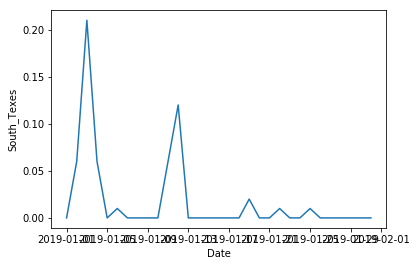

In [54]:
#Visualization for Stationarity from  to 01-01-2019 to 31-01-2019

plt.xlabel("Date")
plt.ylabel("South_Texes")
plt.plot(south1)

**2.1. Rolling Mean and Standard Deviation**

In [55]:
rolmean = south1.rolling(window = 12).mean()

rolstd = south1.rolling(window = 12).std()

print(rolmean,rolstd)

               Texes
Date                
2019-01-01       NaN
2019-01-02       NaN
2019-01-03       NaN
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
2019-01-07       NaN
2019-01-08       NaN
2019-01-09       NaN
2019-01-10       NaN
2019-01-11       NaN
2019-01-12  0.043333
2019-01-13  0.043333
2019-01-14  0.038333
2019-01-15  0.020833
2019-01-16  0.015833
2019-01-17  0.015833
2019-01-18  0.015000
2019-01-19  0.016667
2019-01-20  0.016667
2019-01-21  0.016667
2019-01-22  0.017500
2019-01-23  0.012500
2019-01-24  0.002500
2019-01-25  0.003333
2019-01-26  0.003333
2019-01-27  0.003333
2019-01-28  0.003333
2019-01-29  0.003333
2019-01-30  0.003333
2019-01-31  0.001667                Texes
Date                
2019-01-01       NaN
2019-01-02       NaN
2019-01-03       NaN
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
2019-01-07       NaN
2019-01-08       NaN
2019-01-09       NaN
2019-01-10       NaN
2019-01-11       NaN
2019-01-12  0.065273
2019-01-13  0

No handles with labels found to put in legend.


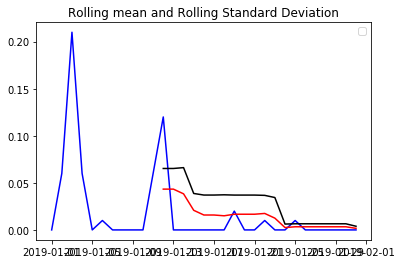

In [56]:
#(Raw/original data = Blue, Rolling Mean = Yellow, Rolling Std = "Red")
raw = plt.plot(south1, color ="blue")
mean = plt.plot(rolmean, color = "red")
std = plt.plot(rolstd, color = "black")
plt.legend(loc="best")
plt.title("Rolling mean and Rolling Standard Deviation")
plt.show(block=False)

**2.2. Augmented Dickey Fuller Test**

In [57]:
x = south1["Texes"].values
result = adfuller(x)
print("ADF Statistics: %f" % result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -1.054944
p-value: 0.732701
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643


**3. Preprocessing Data**

In [58]:
Variables = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/tex_avg.csv")
Texes = Variables["Texes"]
Texes

0     0.00
1     0.06
2     0.21
3     0.06
4     0.00
5     0.01
6     0.00
7     0.00
8     0.00
9     0.00
10    0.06
11    0.12
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.00
18    0.02
19    0.00
20    0.00
21    0.01
22    0.00
23    0.00
24    0.01
25    0.00
26    0.00
27    0.00
28    0.00
29    0.00
30    0.00
Name: Texes, dtype: float64

In [59]:
#log

texprec =np.log(Texes)
texprec

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0         -inf
1    -2.813411
2    -1.560648
3    -2.813411
4         -inf
5    -4.605170
6         -inf
7         -inf
8         -inf
9         -inf
10   -2.813411
11   -2.120264
12        -inf
13        -inf
14        -inf
15        -inf
16        -inf
17        -inf
18   -3.912023
19        -inf
20        -inf
21   -4.605170
22        -inf
23        -inf
24   -4.605170
25        -inf
26        -inf
27        -inf
28        -inf
29        -inf
30        -inf
Name: Texes, dtype: float64

In [60]:
filename="C:/Users/Deepan Ilangkamban R/Desktop/updatas/log_prec_tex.csv"
log_prec_tex = pd.read_csv(filename)
log_prec_tex

,log_tex_prec
0,-2.813411
1,-1.560648
2,-2.813411
3,-4.605170
4,-2.813411
5,-2.120264
6,-3.912023
7,-4.605170
8,-4.605170


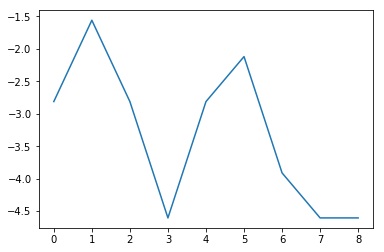

In [61]:
plt.plot(log_prec_tex)
plt.show()

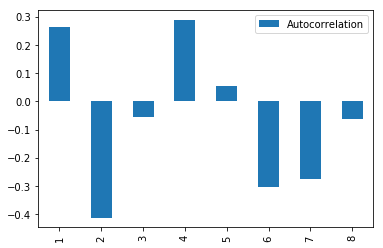

In [62]:
acf_1 = acf(log_prec_tex)[1:9]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

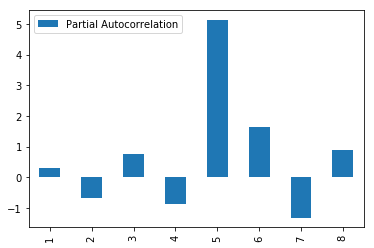

In [63]:
pacf_1 = pacf(log_prec_tex)[1:9]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ["Partial Autocorrelation"]
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

**4. ARIMA Model**

C:\Users\Deepan Ilangkamban R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                    8
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -13.394
Method:                           css   S.D. of innovations              1.291
Date:                Wed, 20 Nov 2019   AIC                             30.787
Time:                        06:15:14   BIC                             30.946
Sample:                             1   HQIC                            29.716
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2240      0.456     -0.491      0.639      -1.118       0.671


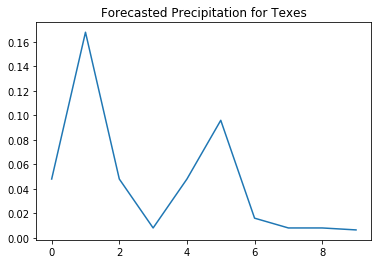

In [64]:
prec_matrix = log_prec_tex.as_matrix()
model = ARIMA(prec_matrix, order =(0,1,0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
predictions = model_fit.predict(1,10, typ ='levels')
predictions
predictionsadjusted = np.exp(predictions)
predictionsadjusted
plt.plot(predictionsadjusted)
plt.title('Forecasted Precipitation for Texes')
plt.show()

                                                Data Visualization

**1. Data Preparation**

In [65]:
d2 = pd.read_csv("C:/Users/Deepan Ilangkamban R/Desktop/updatas/map_usa.csv")
d1 = geopandas.read_file("C:/Users/Deepan Ilangkamban R/Desktop/json/us_states.json")

**2. Choropleth Map for NEWS U.S.A**

In [66]:
map_us = folium.Map(location = [48, -102])
map_us.choropleth(geo_data = d1,
                  name = 'choropleth',
                  data = d2,
                  columns = ['State', 'Average_Precipitation'],
                   key_on = 'feature.properties.name',
                   fill_color = 'YlOrRd',
                   fill_opacity = 0.6,
                   line_opacity = 0.2,
                   legend_name = 'Precipitation for usa',
                   highlight = True,
                  line_color = 'Red' )
map_us